In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4166,3.33e+07,5771,0.8011,0.4683,0.4153
1,4504,4.375e+07,6614,0.7456,0.5633,0.4217
2,3881,3.18e+07,5639,0.5974,0.7645,0.4396
3,3748,2.681e+07,5177,0.7762,0.5015,0.5175
4,4471,4.341e+07,6589,0.6771,0.5224,0.3767
5,4183,3.617e+07,6014,0.7674,0.7416,0.432
6,4081,3.919e+07,6260,0.7333,0.6434,0.4241
7,4928,4.642e+07,6813,0.7448,0.5887,0.4137
8,4609,4.037e+07,6354,0.7392,0.5686,0.5111
9,4666,4.26e+07,6527,0.7256,0.8131,0.4802


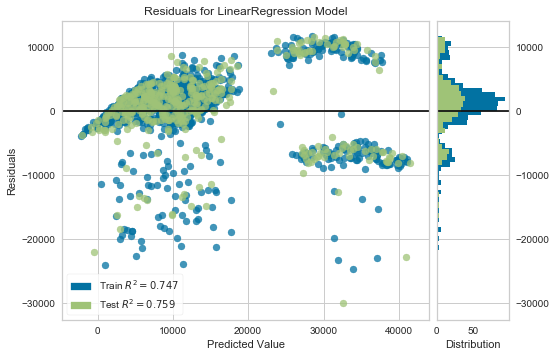

In [5]:
plot_model(lr)

# Experiment 2

In [7]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [10]:
s2

   0.000000                        1.026878   
 
       age_Power2_multiply_bmi_6.0  age_Power2_multiply_children_3  \
 300                     -0.000000                       -0.383008   
 904                      1.661025                        0.000000   
 670                     -0.000000                       -0.734326   
 617                      0.000000                        0.000000   
 373                     -0.000000                       -0.000000   
 ...                           ...                             ...   
 1238                    -0.000000                       -0.318245   
 1147                    -0.000000                       -0.000000   
 106                     -0.000000                       -0.000000   
 1041                    -0.000000                       -0.000000   
 1122                     0.959276                        0.959276   
 
       children_1_multiply_bmi_Power2  bmi_5.0_multiply_age_Power2  \
 300                        -0.000000  

In [11]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3081,2.136e+07,4622,0.8724,0.4133,0.328
1,3405,3.156e+07,5618,0.8165,0.4286,0.3206
2,2985,2.391e+07,4890,0.6972,0.5783,0.3796
3,3132,2.093e+07,4575,0.8252,0.475,0.4442
4,3386,2.932e+07,5415,0.7819,0.4593,0.3177
5,3252,2.674e+07,5171,0.828,0.4569,0.3045
6,3015,2.707e+07,5203,0.8158,0.3822,0.314
7,3541,3.101e+07,5569,0.8295,0.4962,0.328
8,3225,2.317e+07,4814,0.8503,0.4036,0.3572
9,3382,2.985e+07,5464,0.8077,0.5222,0.3731


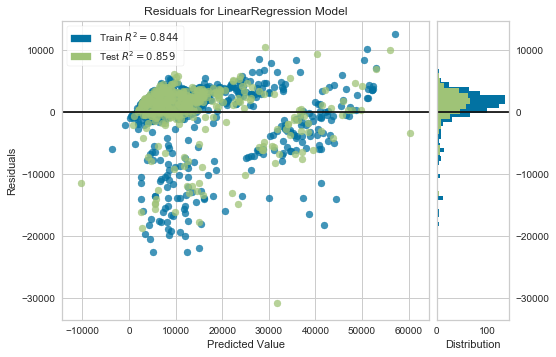

In [12]:
plot_model(lr)

In [13]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              random_state=123, subclass='binary',
                              target='charges',
         

In [14]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [15]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             target='charges',
                          

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
